# 5 Layer CNN Handwriting Text Recognition

Inspiration was based on https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr

Dataset from: https://www.kaggle.com/datasets/landlord/handwriting-recognition

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  1


In [2]:
tf.config.experimental.set_memory_growth(gpus[0],True)

In [3]:
!pip install imutils

  Using cached imutils-0.5.4-py3-none-any.whl


In [3]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import re
import os
import random 
import cv2
import imutils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [4]:
train_dir = r'(your drive name):/(your name)/(your folder)/(your folder)/Train'
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(train_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(train_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [5]:
len(train_data)

140000

In [6]:
val_dir = r'(your drive name):/(your name)/(your folder)/(your folder)/Validation'
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [7]:
len(val_data)

15209

In [8]:
random.shuffle(train_data)
random.shuffle(val_data)

In [9]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [10]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [11]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [12]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [13]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [14]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [15]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [38]:
#5 Layer CNN Model
model = Sequential()

model.add(Conv2D(32, (1, 1), padding = "same", activation='relu', input_shape=(32,32,1), data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(Conv2D(512, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = "same"))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 32, 32, 1)         1056      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 16, 1)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 16, 16, 64)        128       
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 8, 8, 128)         8320      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 4, 4, 256)       

In [40]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [41]:
history = model.fit(train_X,train_Y, epochs=60, batch_size=128, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/60
1094/1094 [==============================] - 12s 8ms/step - loss: 2.8043 - accuracy: 0.1740 - val_loss: 1.9787 - val_accuracy: 0.4359
Epoch 2/60
1094/1094 [==============================] - 8s 8ms/step - loss: 1.6567 - accuracy: 0.4782 - val_loss: 1.5061 - val_accuracy: 0.5780
Epoch 3/60
1094/1094 [==============================] - 8s 8ms/step - loss: 1.2018 - accuracy: 0.6203 - val_loss: 1.2725 - val_accuracy: 0.6469
Epoch 4/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9617 - accuracy: 0.6925 - val_loss: 1.1396 - val_accuracy: 0.7048
Epoch 5/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8087 - accuracy: 0.7391 - val_loss: 1.0877 - val_accuracy: 0.7156
Epoch 6/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7194 - accuracy: 0.7653 - val_loss: 1.0194 - val_accuracy: 0.7442
Epoch 7/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.6634 - accuracy: 0.7810 - val_loss: 0.9523 - val_accuracy

1094/1094 [==============================] - 8s 7ms/step - loss: 0.3110 - accuracy: 0.8856 - val_loss: 0.8193 - val_accuracy: 0.8259
Epoch 58/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3115 - accuracy: 0.8865 - val_loss: 0.8373 - val_accuracy: 0.8227
Epoch 59/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3057 - accuracy: 0.8864 - val_loss: 0.8145 - val_accuracy: 0.8261
Epoch 60/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.3066 - accuracy: 0.8862 - val_loss: 0.7811 - val_accuracy: 0.8361


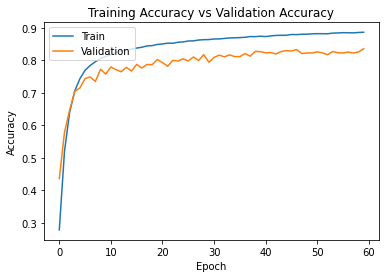

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

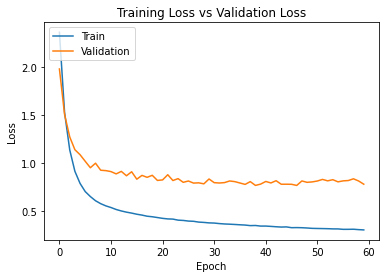

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
test_loss, test_acc = model.evaluate(val_X, val_Y)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

476/476 [==============================] - 2s 3ms/step - loss: 0.7811 - accuracy: 0.8361
Test Loss: 0.7811116576194763
Test Accuracy: 0.8360838890075684


In [46]:
y_pred = model.predict(val_X, verbose=1, batch_size=128)

119/119 [==============================] - 0s 2ms/step


In [47]:
y_pred

array([[4.1609454e-07, 7.7653254e-07, 4.3503609e-05, ..., 1.3416167e-04,
        9.4283041e-07, 1.5654958e-06],
       [2.4222574e-15, 5.0818842e-11, 1.7358882e-10, ..., 1.5351057e-08,
        3.8416697e-06, 6.5327717e-09],
       [3.4674591e-07, 3.0785003e-09, 2.8266507e-07, ..., 1.9042038e-06,
        2.2439517e-07, 2.8600742e-05],
       ...,
       [9.4919815e-11, 8.6826986e-07, 7.3746400e-09, ..., 1.6654963e-06,
        3.8861277e-04, 1.8833116e-06],
       [1.6942263e-15, 7.0819414e-13, 1.2667004e-10, ..., 4.2376783e-07,
        3.8478382e-05, 8.1598714e-08],
       [6.4924920e-06, 3.3113805e-09, 5.9354838e-06, ..., 5.9542754e-07,
        2.4084706e-10, 6.2348278e-07]], dtype=float32)

In [48]:
##for i in y_pred:
 #   print(i)

In [49]:
#rounded_y_pred = model.predict_classes(val_X, verbose=1, batch_size=128)

In [50]:
#for i in rounded_y_pred:
 #   print(i)

In [51]:
#new_y_pred = (y_pred > 0.5)

In [52]:
#new_y_pred

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(accuracy_score(val_Y.argmax(axis=1), y_pred.argmax(axis=1)))

0.836083897692156


In [54]:
print(classification_report(val_Y.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       368
           1       0.92      0.77      0.84      1000
           2       0.92      0.91      0.92      1000
           3       0.95      0.95      0.95      1000
           4       0.94      0.95      0.95      1000
           5       0.97      0.95      0.96      1000
           6       0.94      0.96      0.95      1000
           7       0.86      0.97      0.92       190
           8       0.92      0.94      0.93      1000
           9       0.88      0.93      0.90      1000
          10       0.75      0.33      0.46       392
          11       0.84      0.78      0.81       385
          12       0.43      0.97      0.60       168
          13       0.86      0.51      0.64       322
          14       0.83      0.63      0.71       308
          15       0.77      0.89      0.82       324
          16       0.75      0.66      0.70       363
          17       0.77    

In [55]:
#cm = confusion_matrix(val_Y.argmax(axis=1),rounded_y_pred)
#print(cm)

In [56]:
cm=confusion_matrix(val_Y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[320   0   0 ...   0   0   0]
 [  0 770   0 ...   0   0   0]
 [  0   0 914 ...   5   0  50]
 ...
 [  0   0   0 ... 108   0   1]
 [  0   0   0 ...   3 145   1]
 [  0   0  13 ...   0   0 162]]


In [58]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
        
    #labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    #labels = np.asarray(labels).reshape(2,2)

    #sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
     #           xticklabels = categories, yticklabels = categories)

    plt.tight_layout()
    plt.xlabel("Predicted values", fontdict = {'size':18}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':18}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':30}, pad = 20)

Confusion matrix, without normalization
[[320   0   0 ...   0   0   0]
 [  0 770   0 ...   0   0   0]
 [  0   0 914 ...   5   0  50]
 ...
 [  0   0   0 ... 108   0   1]
 [  0   0   0 ...   3 145   1]
 [  0   0  13 ...   0   0 162]]


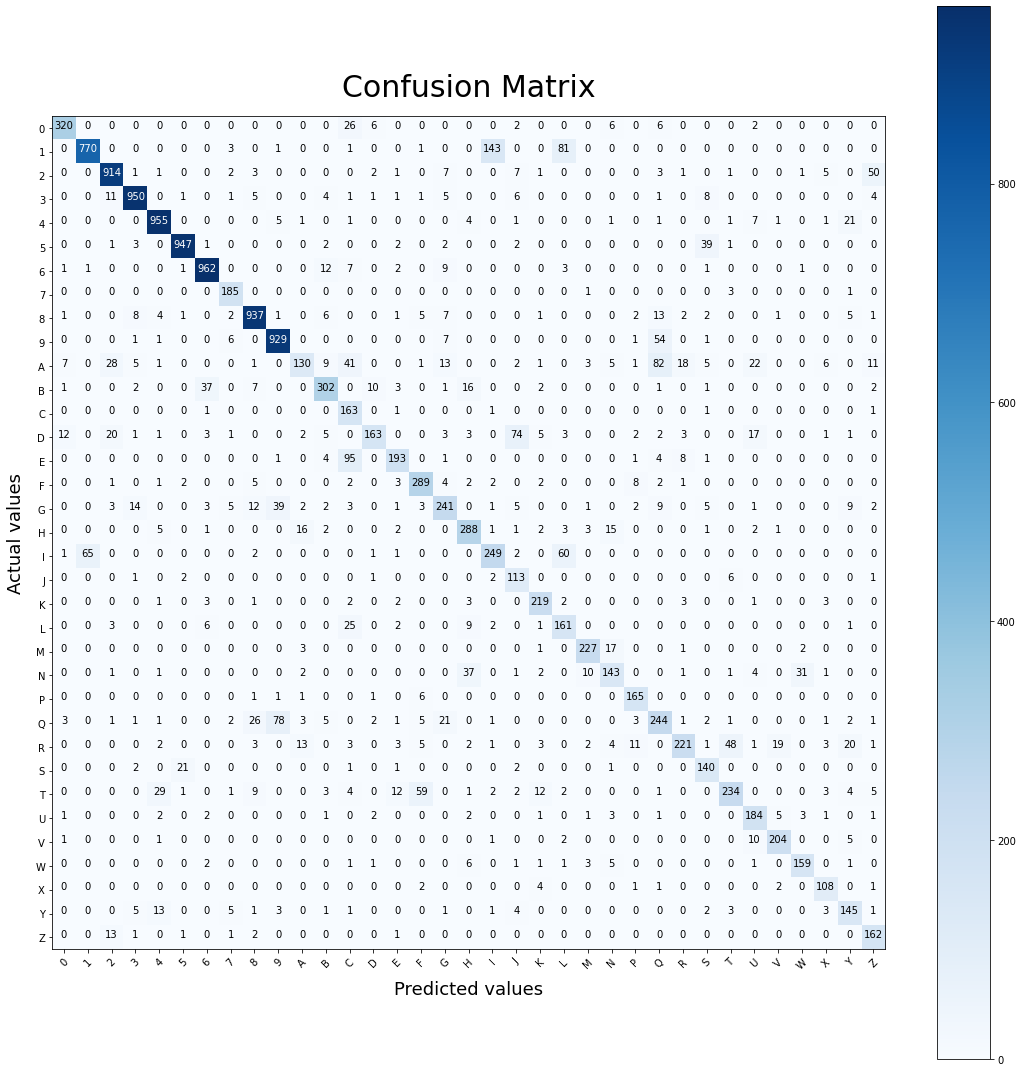

In [59]:
#cnf_matrix = confusion_matrix(val_Y.argmax(axis=1), y_pred.argmax(axis=1))
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 
                  'V', 'W', 'X', 'Y', 'Z']
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)
plt.show()

## Testing Stage 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [60]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [61]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [62]:
def get_word(letter):
    word = "".join(letter)
    return word

E6WIZ3


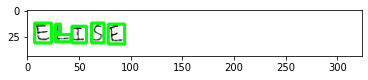

In [76]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\train_v2\train\TRAIN_00013.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

LIJQD


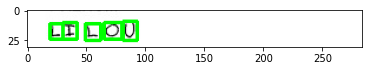

In [77]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\train_v2\train\TRAIN_00023.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

3UPFGYX


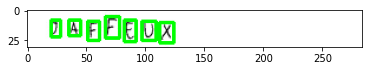

In [78]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\train_v2\train\TRAIN_00030.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

QD99


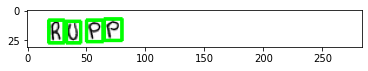

In [79]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\validation_v2\validation\VALIDATION_0005.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

VAL3WTIUG


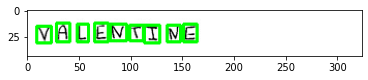

In [80]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\test_v2\test\TEST_0007.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)